In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Heart_health.csv")

In [3]:
df.head()

,ID,Name,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack
0,1,John Doe,45,Male,175,80,120/80,200,90,No,3,0
1,2,Jane Smith,35,Female,160,65,110/70,180,80,No,2,0
2,3,Michael Johnson,55,Male,180,85,130/85,220,95,Yes,4,1
3,4,Sarah Brown,40,Female,165,70,115/75,190,85,No,3,0
4,5,David Lee,50,Male,170,75,125/80,210,92,Yes,2,1


In [4]:
df.drop(["ID","Name"],axis=1,inplace=True)

In [5]:
df.head()

,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack
0,45,Male,175,80,120/80,200,90,No,3,0
1,35,Female,160,65,110/70,180,80,No,2,0
2,55,Male,180,85,130/85,220,95,Yes,4,1
3,40,Female,165,70,115/75,190,85,No,3,0
4,50,Male,170,75,125/80,210,92,Yes,2,1


In [6]:
df["Gender"].replace({"Male":0,"Female":1},inplace=True)

In [7]:
df["Smoker"].replace({"No":0,"Yes":1},inplace=True)

In [8]:
df.head()

,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack
0,45,0,175,80,120/80,200,90,0,3,0
1,35,1,160,65,110/70,180,80,0,2,0
2,55,0,180,85,130/85,220,95,1,4,1
3,40,1,165,70,115/75,190,85,0,3,0
4,50,0,170,75,125/80,210,92,1,2,1


In [9]:
c = df.corr()

C:\Users\perumal\AppData\Local\Temp\ipykernel_9748\4112786098.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr()


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

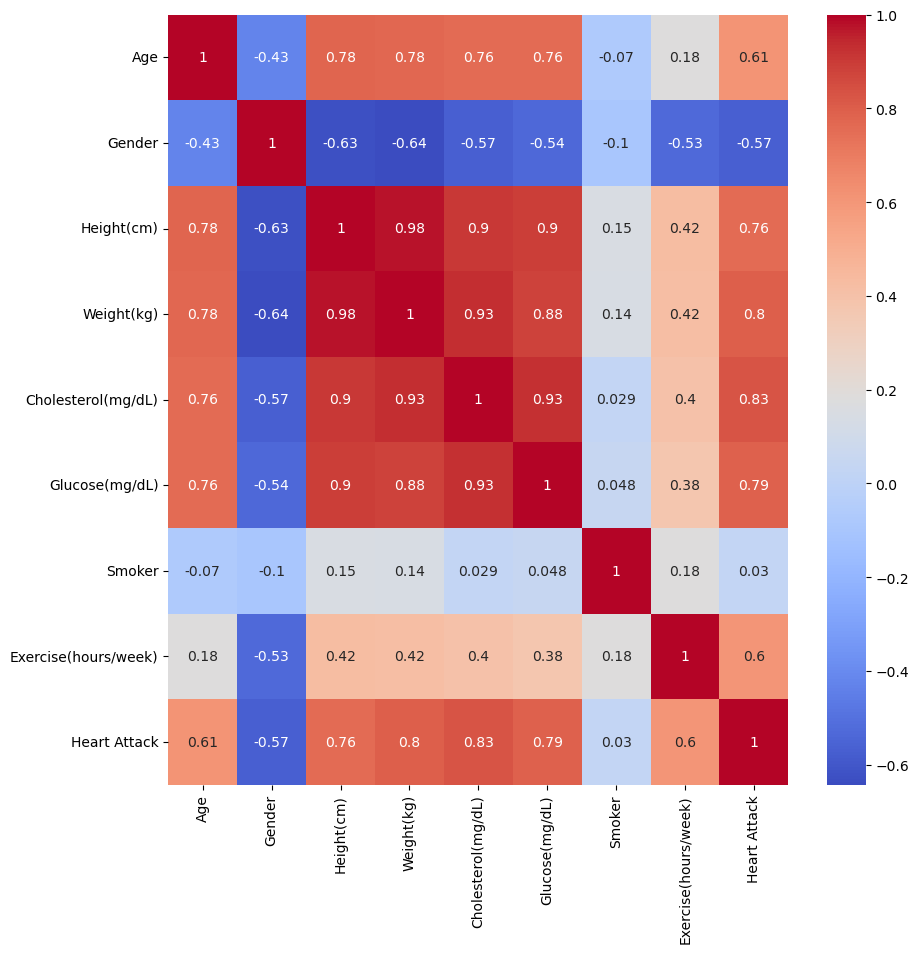

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(c,annot=True,cmap="coolwarm")
plt.show()

In [12]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure(mmHg)'].str.split('/', expand=True)

In [13]:
df.head()

,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack,Systolic,Diastolic
0,45,0,175,80,120/80,200,90,0,3,0,120,80
1,35,1,160,65,110/70,180,80,0,2,0,110,70
2,55,0,180,85,130/85,220,95,1,4,1,130,85
3,40,1,165,70,115/75,190,85,0,3,0,115,75
4,50,0,170,75,125/80,210,92,1,2,1,125,80


In [14]:
df.drop("Blood Pressure(mmHg)",inplace=True,axis=1)

In [15]:
df

,Age,Gender,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack,Systolic,Diastolic
0,45,0,175,80,200,90,0,3,0,120,80
1,35,1,160,65,180,80,0,2,0,110,70
2,55,0,180,85,220,95,1,4,1,130,85
3,40,1,165,70,190,85,0,3,0,115,75
4,50,0,170,75,210,92,1,2,1,125,80
...,...,...,...,...,...,...,...,...,...,...,...
719,39,1,166,68,195,88,0,3,0,118,76
720,56,0,179,83,220,100,0,2,1,123,80
721,43,1,167,70,200,92,0,2,0,120,78
722,53,0,182,86,225,98,1,2,1,125,78


In [16]:
x  = df.drop("Heart Attack",axis=1)
y=df["Heart Attack"]

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression()
model.fit(x_train,y_train)

c:\Users\perumal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred = model.predict(x_test)

In [21]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)

In [22]:
r2

0.8856917619235317

In [23]:
import pickle
import pickle
filename="model.sav"
pickle.dump(model,open(filename,'wb'))

In [24]:
x_test.head()

,Age,Gender,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Systolic,Diastolic
326,58,0,173,79,215,96,0,3,122,80
518,55,0,181,84,220,100,1,3,125,78
554,55,0,181,84,220,100,1,3,125,78
33,38,1,163,67,195,88,0,2,116,74
375,36,1,162,68,195,88,0,1,118,72
